In [9]:
import torch
import torchvision
import torch.nn as nn

import matplotlib.pyplot as plt
import os
import numpy as np


device = 'cuda' if torch.cuda.is_available() else 'cpu'
cnn_model = torchvision.models.resnet34(weights=True)
num_features = cnn_model.fc.in_features
cnn_model.fc = nn.Linear(num_features, 9)
cnn_model.load_state_dict(torch.load('./PyeonHaengModel.pth'))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_model.parameters(), lr=0.001, momentum=0.9)

cnn_model.cuda()

test_dir = './dataset/AI-DATASET/data/test'

transforms_test = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

class_names = ['beverage_bottle', 'beverage_can', 'beverage_milk', 'dailynecessity', 'iceCream', 'instanceFood', 'noodle_bag', 'noodle_cup', 'snack']


c:\Users\kde96\.conda\envs\PyeonHaeng\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    
    plt.imshow(input)
    plt.title(title)
    plt.show()


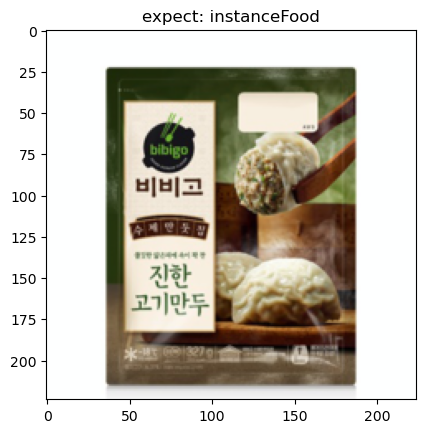

In [15]:
from PIL import Image

image = Image.open('./57.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = cnn_model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='expect: ' + class_names[preds[0]])
